### Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional, GRU, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import json



### Load The Dataset

In [ ]:
df = pd.read_csv('/content/final_data.csv')
df.head()

,Datetime,Traffic flow,Vehicle count,Road name
0,2024-09-23 16:36:00,mid,10,King Fahad Road
1,2024-09-23 16:37:00,mid,10,King Fahad Road
2,2024-09-23 16:38:00,mid,10,King Fahad Road
3,2024-09-23 16:39:00,light,9,King Fahad Road
4,2024-09-23 16:40:00,light,9,King Fahad Road


### Feature Engineering

In [ ]:
df['Road length'] = np.random.choice([50, 60, 70, 80, 90], size=len(df))
df['Traffic Density'] = df['Vehicle count'] / df['Road length']
df

,Datetime,Traffic flow,Vehicle count,Road name,Road length,Traffic Density
0,2024-09-23 16:36:00,mid,10,King Fahad Road,80,0.125000
1,2024-09-23 16:37:00,mid,10,King Fahad Road,50,0.200000
2,2024-09-23 16:38:00,mid,10,King Fahad Road,80,0.125000
3,2024-09-23 16:39:00,light,9,King Fahad Road,50,0.180000
4,2024-09-23 16:40:00,light,9,King Fahad Road,60,0.150000
...,...,...,...,...,...,...
46140,2024-09-23 23:55:00,light,6,King Fahad Road,60,0.100000
46141,2024-09-23 23:56:00,light,4,King Fahad Road,50,0.080000
46142,2024-09-23 23:57:00,light,7,King Fahad Road,70,0.100000
46143,2024-09-23 23:58:00,light,7,King Fahad Road,50,0.140000


####Setting the index for Datetime column and sort the values

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
df.set_index('Datetime', inplace=True)
df.sort_values(by='Datetime', inplace=True)
df

,Traffic flow,Vehicle count,Road name,Road length,Traffic Density
Datetime,,,,,
2024-08-23 06:00:00,heavy,36,King Fahad Road,60,0.600000
2024-08-23 06:01:00,heavy,32,King Fahad Road,50,0.640000
2024-08-23 06:02:00,heavy,47,King Fahad Road,80,0.587500
2024-08-23 06:03:00,heavy,43,King Fahad Road,80,0.537500
2024-08-23 06:04:00,heavy,41,King Fahad Road,80,0.512500
...,...,...,...,...,...
2024-09-25 21:56:51,light,4,King Fahad Road,70,0.057143
2024-09-25 21:57:51,light,3,King Fahad Road,50,0.060000
2024-09-25 21:58:51,light,2,King Fahad Road,50,0.040000


## Exploratory Data Analysis (EDA)




Inspect the dataset

Dataset structure

Summary statistics

Check for missing values

Distribution of features

Categorical feature analysis

Correlation matrix

Outlier detection

---


In [ ]:
df.shape

(46145, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46145 entries, 2024-08-23 06:00:00 to 2024-09-25 22:00:51
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Traffic flow     46145 non-null  object 
 1   Vehicle count    46145 non-null  int64  
 2   Road name        46145 non-null  object 
 3   Road length      46145 non-null  int64  
 4   Traffic Density  46145 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [ ]:
df.sample(100)

,Traffic flow,Vehicle count,Road name,Road length,Traffic Density
Datetime,,,,,
2024-09-07 19:10:00,heavy,48,King Fahad Road,90,0.533333
2024-09-14 01:50:00,light,3,King Fahad Road,90,0.033333
2024-09-02 04:09:00,light,9,King Fahad Road,80,0.112500
2024-09-10 02:29:00,light,6,King Fahad Road,60,0.100000
2024-08-31 10:39:00,light,7,King Fahad Road,50,0.140000
...,...,...,...,...,...
2024-08-27 14:48:00,heavy,28,King Fahad Road,90,0.311111
2024-09-17 01:10:00,light,4,King Fahad Road,80,0.050000
2024-08-24 20:17:00,heavy,49,King Fahad Road,80,0.612500


In [ ]:
df.dtypes

,0
Traffic flow,object
Vehicle count,int64
Road name,object
Road length,int64
Traffic Density,float64


In [ ]:
df.describe()

,Vehicle count,Road length,Traffic Density
count,46145.000000,46145.000000,46145.000000
mean,17.381103,70.029689,0.259124
std,13.718334,14.180133,0.216191
min,1.000000,50.000000,0.011111
25%,6.000000,60.000000,0.087500
50%,11.000000,70.000000,0.166667
75%,27.000000,80.000000,0.400000
max,49.000000,90.000000,0.980000


In [ ]:
df.describe(include=['object'])

,Traffic flow,Road name
count,46145,46145
unique,3,1
top,light,King Fahad Road
freq,21578,46145


In [ ]:
df.isnull().sum()

,0
Traffic flow,0
Vehicle count,0
Road name,0
Road length,0
Traffic Density,0


### Data Visualization

array([[<Axes: title={'center': 'Vehicle count'}>,
        <Axes: title={'center': 'Road length'}>,
        <Axes: title={'center': 'Traffic Density'}>]], dtype=object)

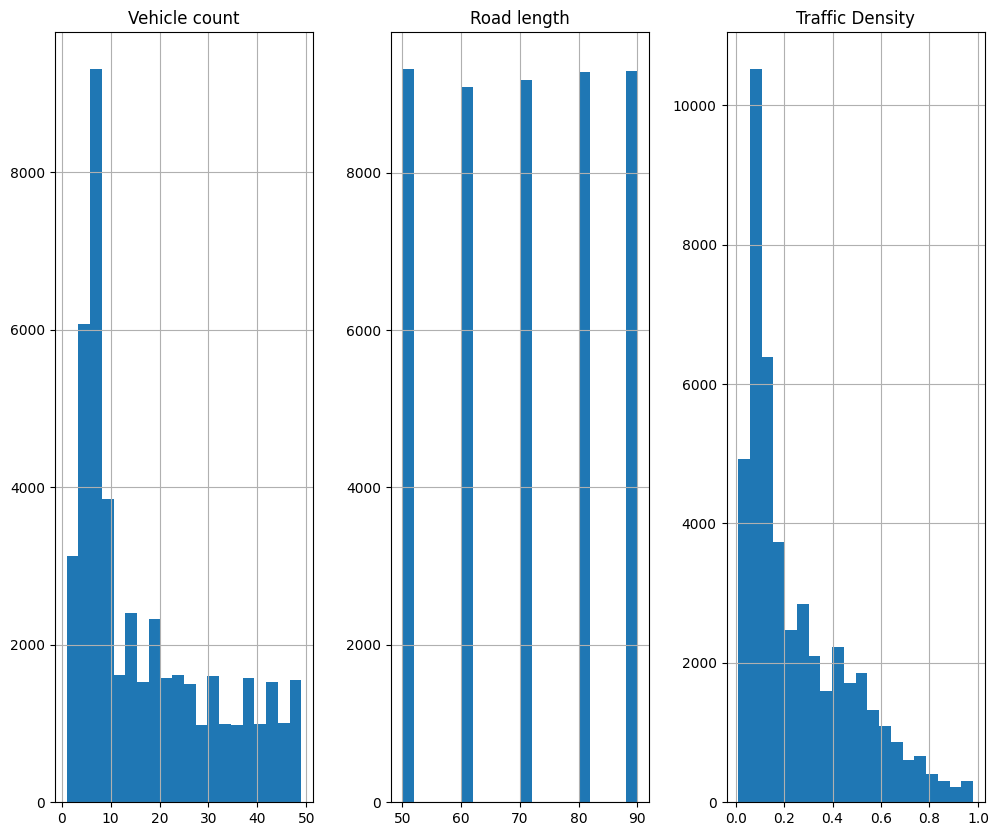

In [ ]:
# Histograms for numeric features
df.hist(bins=20, figsize=(12, 10), layout=(len(df.columns)//3, 3))

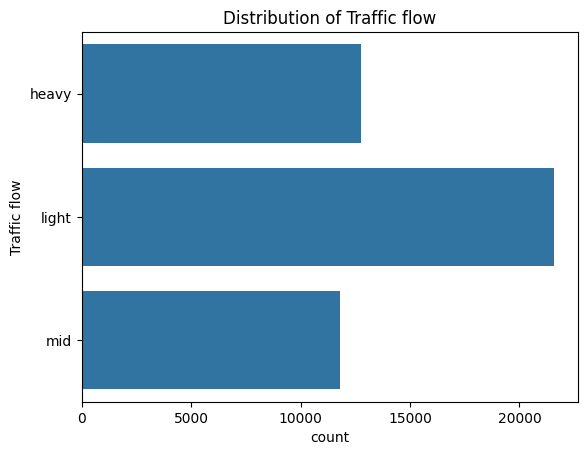

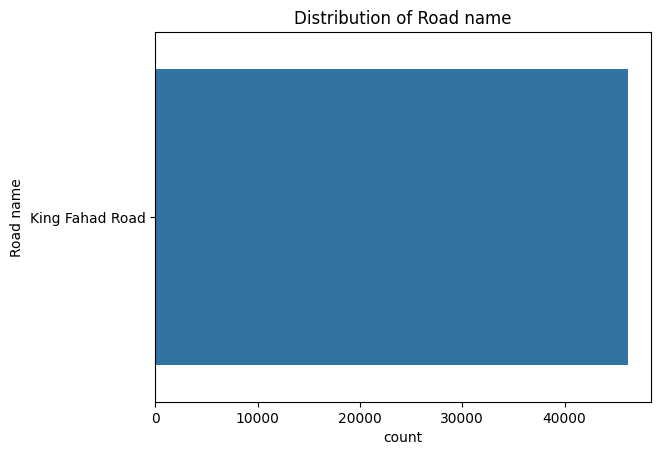

In [ ]:
# Bar plot for categorical columns
import seaborn as sns
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(y=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

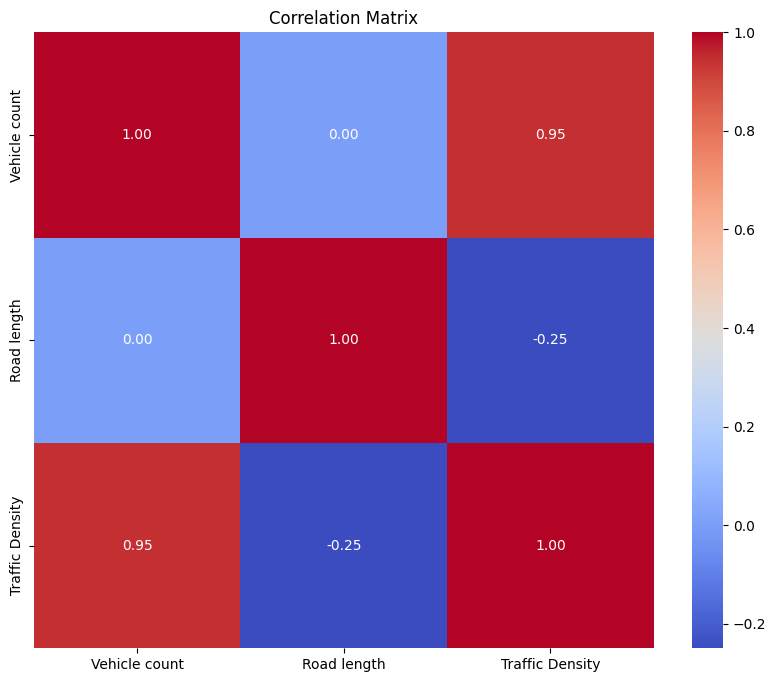

In [ ]:
# Heatmap
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

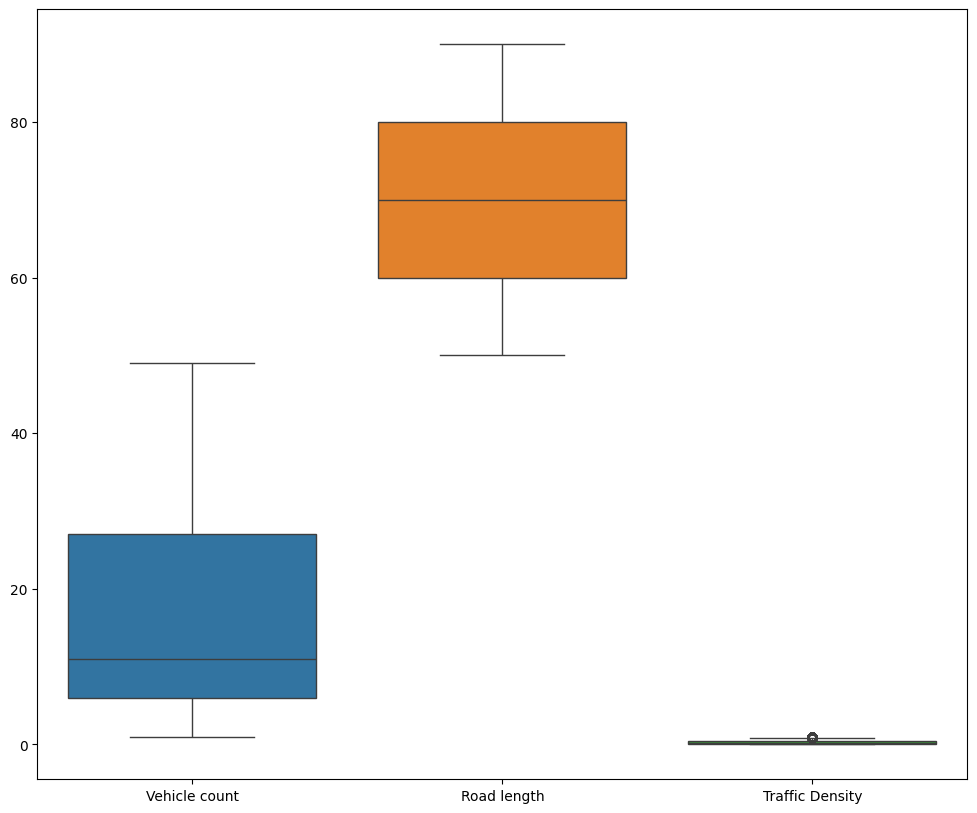

In [ ]:
# detect outlires
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)

plt.show()

In [ ]:
# function to handle outlires

def handle_outliers(df):

    numeric_cols = df.select_dtypes(include=['float64', 'int64'])


    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    # Filter out rows with outlires
    is_outlier = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))


    df.drop(df[is_outlier.any(axis=1)].index, inplace=True)


handle_outliers(df)

In [ ]:
df

,Traffic flow,Vehicle count,Road name,Road length,Traffic Density
Datetime,,,,,
2024-08-23 06:00:00,heavy,36,King Fahad Road,60,0.600000
2024-08-23 06:01:00,heavy,32,King Fahad Road,50,0.640000
2024-08-23 06:02:00,heavy,47,King Fahad Road,80,0.587500
2024-08-23 06:03:00,heavy,43,King Fahad Road,80,0.537500
2024-08-23 06:04:00,heavy,41,King Fahad Road,80,0.512500
...,...,...,...,...,...
2024-09-25 21:56:51,light,4,King Fahad Road,70,0.057143
2024-09-25 21:57:51,light,3,King Fahad Road,50,0.060000
2024-09-25 21:58:51,light,2,King Fahad Road,50,0.040000


In [ ]:
#Drop the unnecessary columns for simplicity
df.drop(columns=['Traffic Density','Road length', 'Traffic flow','Road name'], inplace=True)

In [ ]:
df

,Vehicle count
Datetime,
2024-08-23 06:00:00,36
2024-08-23 06:01:00,32
2024-08-23 06:02:00,47
2024-08-23 06:03:00,43
2024-08-23 06:04:00,41
...,...
2024-09-25 21:56:51,4
2024-09-25 21:57:51,3
2024-09-25 21:58:51,2


### Data Spliting


In [ ]:
len(df)

45524

In [ ]:
train_len = int(len(df) * 0.7) # 70% for training
val_len = int(len(df) * 0.15) # 15% for validation

# Split the data
train = df.iloc[:train_len]
val = df.iloc[train_len:train_len + val_len]
test = df.iloc[train_len + val_len:]

In [ ]:
train.shape, val.shape, test.shape

((31866, 1), (6828, 1), (6830, 1))

#### Min-Max Scaler

In [ ]:
scaler = MinMaxScaler()

scaler.fit(train)

MinMaxScaler()

In [ ]:
train_scaled = scaler.transform(train)
val_scaled = scaler.transform(val)
test_scaled = scaler.transform(test)

In [ ]:
from tensorflow.keras.utils import timeseries_dataset_from_array

window_size = 60 # take the first 8 hours to predict the next hour

train_Xy = timeseries_dataset_from_array(train_scaled, targets=train_scaled[window_size:], sequence_length=window_size)
val_Xy = timeseries_dataset_from_array(val_scaled, targets=val_scaled[window_size:], sequence_length=window_size)
test_Xy = timeseries_dataset_from_array(test_scaled, targets=test_scaled[window_size:], sequence_length=window_size)


In [ ]:
X_test, y_test = next(iter(test_Xy))

## Time Series Models

### GRU Model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Build Arch
GRU_model = Sequential([GRU(units=520, activation='tanh', return_sequences=True ), # 1st hidden layer
                    GRU(units=520, activation='tanh', return_sequences=True ), # 2nd hidden layer
                    GRU(units=520, activation='tanh' ), # 3rd hidden layer


                    Dense(units=1, activation='relu')]) #output

# Compile -> set configration
GRU_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit -> train
GRU_history = GRU_model.fit(train_Xy, validation_data=val_Xy, epochs=100, callbacks=[early_stopping])

Epoch 1/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - loss: 0.0329 - mae: 0.1251 - val_loss: 0.0138 - val_mae: 0.0856
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 0.0192 - mae: 0.0986 - val_loss: 0.0140 - val_mae: 0.0872
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 0.0149 - mae: 0.0892 - val_loss: 0.0168 - val_mae: 0.0952
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 0.0170 - mae: 0.0950 - val_loss: 0.0149 - val_mae: 0.0897
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 0.0168 - mae: 0.0936 - val_loss: 0.0141 - val_mae: 0.0894
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 0.0135 - mae: 0.0857 - val_loss: 0.0141 - val_mae: 0.0870
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 0.0134 - mae: 0.0858 - val_loss: 0.0141 - val_mae: 0.0889
Epoch 8/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 0.0138 - mae: 0.0862 - val_loss: 0.0135 - val_mae: 0.0867
Epoch 9/100
249/249 ━━━━━━━━━━━━

<Axes: >

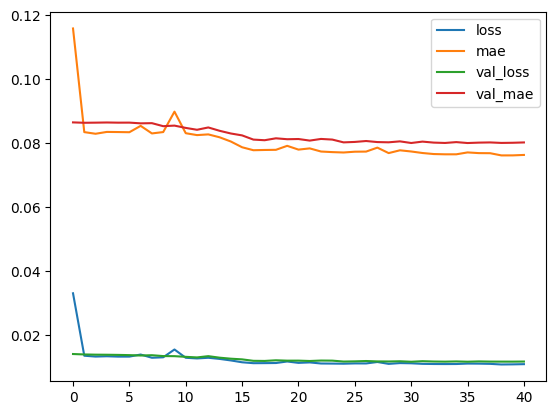

In [ ]:
pd.DataFrame(GRU_history.history).plot()

In [ ]:
# Make predictions
GRU_predict = GRU_model.predict(X_test)
GRU_predict

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


array([[0.31730324],
       [0.3150415 ],
       [0.3042667 ],
       [0.30568483],
       [0.31182173],
       [0.31373072],
       [0.3096429 ],
       [0.30843794],
       [0.31284857],
       [0.31421143],
       [0.31217104],
       [0.31755602],
       [0.30221152],
       [0.17668341],
       [0.01854418],
       [0.06720199],
       [0.10003255],
       [0.05204403],
       [0.05681677],
       [0.03605243],
       [0.04057784],
       [0.03900448],
       [0.07066801],
       [0.07767534],
       [0.05869057],
       [0.07831811],
       [0.07871614],
       [0.07618375],
       [0.07921691],
       [0.06745809],
       [0.07123111],
       [0.07146665],
       [0.06672081],
       [0.06632661],
       [0.06787167],
       [0.07053102],
       [0.06554344],
       [0.06485733],
       [0.07127295],
       [0.07014128],
       [0.06833179],
       [0.06756968],
       [0.05739228],
       [0.05491216],
       [0.05474381],
       [0.07569158],
       [0.07394322],
       [0.082

In [ ]:
inverted_GRU_predict = scaler.inverse_transform(GRU_predict)
y_true = scaler.inverse_transform(y_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_true, inverted_GRU_predict)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 40.08772840057867
RMSE: 6.3314870607605815


In [ ]:
datetime_values = df.index[train_len + val_len + window_size: train_len + val_len + len(y_true) + window_size]

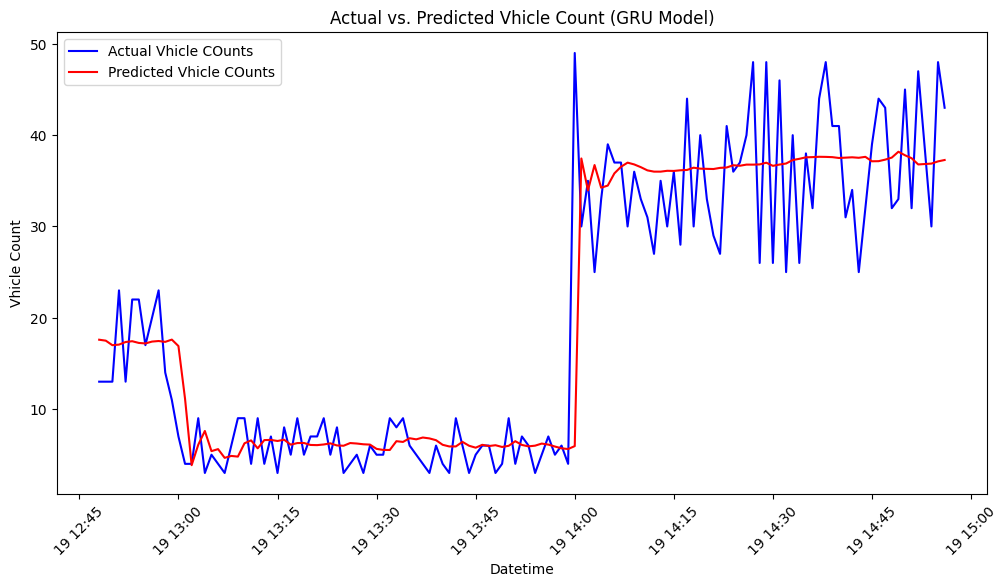

In [ ]:
# Plot the prediction (y_predict) Vs. (y_true)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(datetime_values, y_true, color='blue', label='Actual Vhicle COunts')
plt.plot(datetime_values, inverted_GRU_predict, color='red', label='Predicted Vhicle COunts')
plt.xticks(rotation=45)
plt.title('Actual vs. Predicted Vhicle Count (GRU Model)')
plt.xlabel('Datetime')
plt.ylabel('Vhicle Count')
plt.legend()
plt.show()

#### Saving the predictions in Json file

In [ ]:
data_dict = {}

for dt, actual, predicted in zip(datetime_values, y_true.flatten(), inverted_GRU_predict.flatten()):
    # Convert NumPy float32 to native Python float
    # This is the crucial change to handle the TypeError
    data_dict[dt.strftime("%Y-%m-%d %H:%M:%S")] = {
        "actual_value": actual.item() if isinstance(actual, np.generic) else actual, #handle numpy scalar types in actual_value
        "predicted_value": float(predicted),
        "road_name": "King Fahad Road"
    }

with open('gru_predictions_2.json', 'w') as f:
    json.dump(data_dict, f, indent=4)

### LSTM

In [ ]:

# Build Arch
LSTM_model = Sequential([
                    Bidirectional(LSTM(units=128, activation='tanh', return_sequences=True )), # 1st hidden layer
                    Bidirectional(LSTM(units=128, activation='tanh', return_sequences=True )), # 2nd hidden layer
                    Bidirectional(LSTM(units=128, activation='tanh', return_sequences=True )), # 3rd hidden layer
                    Bidirectional(LSTM(units=32, activation='tanh' )), # 4th hidden layer

                    Dense(units=1, activation='linear')]) #output layer

# Compile -> set configration
LSTM_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit -> train
LSTM_history = LSTM_model.fit(train_Xy, validation_data=val_Xy, epochs=100, callbacks=[early_stopping])

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 64s 549ms/step - loss: 0.0128 - mae: 0.0857 - val_loss: 0.0039 - val_mae: 0.0558
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 57s 535ms/step - loss: 0.0105 - mae: 0.0757 - val_loss: 0.0079 - val_mae: 0.0833
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 56s 532ms/step - loss: 0.0130 - mae: 0.0814 - val_loss: 0.0065 - val_mae: 0.0742
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 56s 532ms/step - loss: 0.0118 - mae: 0.0778 - val_loss: 0.0074 - val_mae: 0.0785
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 56s 530ms/step - loss: 0.0120 - mae: 0.0798 - val_loss: 0.0027 - val_mae: 0.0422
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 56s 530ms/step - loss: 0.0120 - mae: 0.0804 - val_loss: 0.0061 - val_mae: 0.0688
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 56s 529ms/step - loss: 0.0121 - mae: 0.0813 - val_loss: 0.0132 - val_mae: 0.1090
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 56s 529ms/step - loss: 0.0121 - mae: 0.0816 - val_loss: 0.0102 - val_mae: 0.0944
Epoch 9/100
106/106 ━━━━

<Axes: >

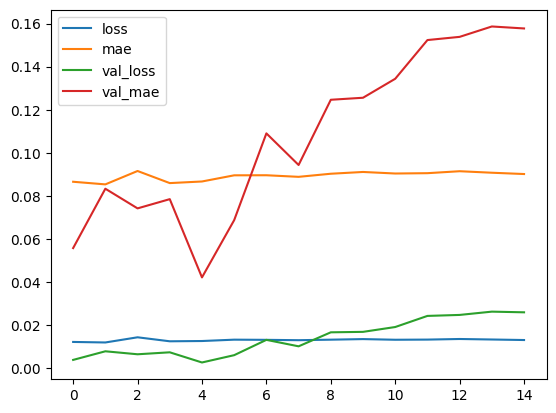

In [ ]:
pd.DataFrame(LSTM_history.history).plot()

In [ ]:
# Make predictions
LSTM_predict = GRU_model.predict(X_test)
LSTM_predict

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


array([[0.12803364],
       [0.14311066],
       [0.14381716],
       [0.14805377],
       [0.13503537],
       [0.12400954],
       [0.11710536],
       [0.11326568],
       [0.11346956],
       [0.11274455],
       [0.11415009],
       [0.10726853],
       [0.09893557],
       [0.09269536],
       [0.10529301],
       [0.10020004],
       [0.09704106],
       [0.10150996],
       [0.10072711],
       [0.10115502],
       [0.10692807],
       [0.10517569],
       [0.10453723],
       [0.11149223],
       [0.10827249],
       [0.10530259],
       [0.11426852],
       [0.11295822],
       [0.12080579],
       [0.1255843 ],
       [0.1231166 ],
       [0.11453676],
       [0.10663891],
       [0.10798681],
       [0.1068566 ],
       [0.10121072],
       [0.09467027],
       [0.09442231],
       [0.09332764],
       [0.09029277],
       [0.08417208],
       [0.08107987],
       [0.0777272 ],
       [0.07484039],
       [0.07173675],
       [0.07176939],
       [0.06875949],
       [0.071

In [ ]:
inverted_LSTM_predict = scaler.inverse_transform(LSTM_predict)

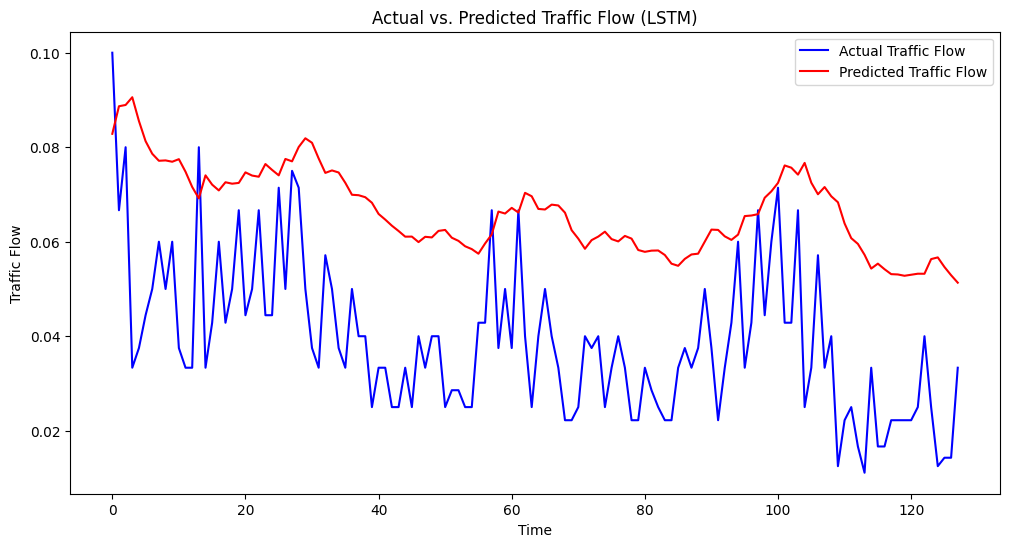

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_true, color='blue', label='Actual Traffic Flow')
plt.plot(inverted_LSTM_predict, color='red', label='Predicted Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow (LSTM)')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()

### gru predictions 2 -- window_siz = 120

In [ ]:
from tensorflow.keras.utils import timeseries_dataset_from_array

window_size = 60 # take the first 8 hours to predict the next hour

train_Xy = timeseries_dataset_from_array(train_scaled, targets=train_scaled[window_size:], sequence_length=window_size)
val_Xy = timeseries_dataset_from_array(val_scaled, targets=val_scaled[window_size:], sequence_length=window_size)
test_Xy = timeseries_dataset_from_array(test_scaled, targets=test_scaled[window_size:], sequence_length=window_size)
